In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
data_folder = r'C:\Users\ocni\PycharmProjects\delphin_6_automation\data_process\simtime_prediction\data'
excel_file = os.path.join(data_folder, 'sim_time.xlsx')

data = pd.read_excel(excel_file)
data.shape

(642, 22)

Text(0.5,0,'Simulation Time in minutes')

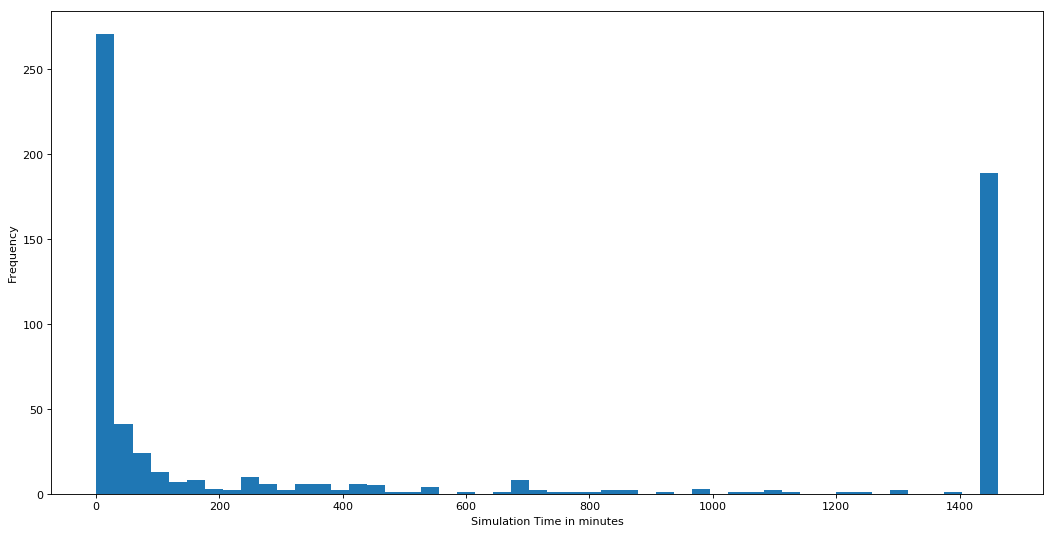

In [3]:
plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
(data['time'][data['time'] < 1500 * 60] / 60).plot('hist', bins=50)
plt.xlabel('Simulation Time in minutes')
#plt.savefig('simulation_time_histogram.png')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

c:\users\ocni\appdata\local\continuum\anaconda3\envs\ribuild\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [5]:
y_data = data['time']

x_data = data.loc[:, data.columns != 'time']
x_data.loc[:, 'exterior climate'] = np.ones(len(x_data['exterior climate']))
x_data = x_data.fillna(0.0)
x_data.loc[x_data.loc[:, 'interior climate'] == 'a', 'interior climate'] = 0.0
x_data.loc[x_data.loc[:, 'interior climate'] == 'b', 'interior climate'] = 1.0
x_data.loc[x_data.loc[:, 'system_name'] == 'ClimateBoard', 'system_name'] = 1.0
x_data.head()

c:\users\ocni\appdata\local\continuum\anaconda3\envs\ribuild\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,exterior heat transfer coefficient slope,exterior moisture transfer coefficient,solar absorption,rain scale factor,interior heat transfer coefficient,interior moisture transfer coefficient,interior sd value,wall orientation,wall core width,wall core material,...,plaster material,start year,exterior climate,interior climate,exterior_plaster,system_name,insulation_material,finish_material,detail_material,insulation_thickness
0,3.947266,5.652344e-09,0.40625,0.339844,8.671875,4.843750e-09,0.023438,11.25,0.8,563,...,148,2020,1.0,0,True,0,0.0,0.0,0.0,0.0
1,3.947266,5.652344e-09,0.40625,0.339844,8.671875,4.843750e-09,0.023438,11.25,0.8,563,...,148,2020,1.0,0,False,0,0.0,0.0,0.0,0.0
2,3.947266,5.652344e-09,0.40625,0.339844,8.671875,4.843750e-09,0.023438,11.25,0.8,563,...,148,2020,1.0,0,True,1,707.0,722.0,705.0,25.0
3,3.947266,5.652344e-09,0.40625,0.339844,8.671875,4.843750e-09,0.023438,11.25,0.8,563,...,148,2020,1.0,0,True,1,707.0,722.0,705.0,30.0
4,3.947266,5.652344e-09,0.40625,0.339844,8.671875,4.843750e-09,0.023438,11.25,0.8,563,...,148,2020,1.0,0,True,1,707.0,722.0,705.0,50.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=0)

In [16]:
# Linear Model
linreg = linear_model.LinearRegression(normalize=True)
linreg.fit(X_train, y_train)

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))

linear model intercept: -69634.13298424921
linear model coeff:
[-5.07160940e+02 -2.82722740e+12 -1.27683566e+04  2.94733331e+04
  1.20472021e+03  1.14201809e+12  1.50517269e+04  2.30144067e+01
 -1.21212712e+03  3.57547918e+01 -7.82660789e+05  3.61945265e+00
  4.42304048e+01  2.26718839e-07  2.37031227e+03 -5.02094730e+04
 -2.10968157e+05  8.96493937e+02 -2.92199664e+02 -2.99245613e+02
 -1.68989133e+00]
R-squared score (training): 0.611
R-squared score (test): 0.526
Number of non-zero features: 21


In [15]:
# Ridge Model

linridge = linear_model.Ridge(alpha=20.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))


ridge regression linear model intercept: 194260.12074234092
ridge regression linear model coeff:
[ 9.48842199e+02 -1.55559217e-04 -1.18282948e+03  2.58604855e+04
  4.05257278e+02  4.54087346e-05  5.80936189e+03  1.41521867e+01
  4.47637137e+03  5.13893534e+01 -5.96239621e+01 -2.04493795e+00
 -1.01210777e+02  0.00000000e+00  1.78980494e+03 -4.22859026e+04
  6.06101773e-03 -7.37588403e+00  4.37605482e+00  4.27301751e+00
 -2.48799883e+00]
R-squared score (training): 0.583
R-squared score (test): 0.507
Number of non-zero features: 20


In [14]:
# Ridge Model Normalized
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge_normal = linear_model.Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'.format(linridge_normal.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge_normal.coef_))
print('R-squared score (training): {:.3f}'.format(linridge_normal.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge_normal.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge_normal.coef_ != 0)))

ridge regression linear model intercept: 19136.780094223308
ridge regression linear model coeff:
[  4223.94819695 -11501.24094764  -2129.56399145  33807.08827084
   1995.74958643   6680.9960668    9872.30560744   8018.43562794
   -140.00605097   8130.73921101   -527.60183468    911.79501018
   -602.73817147      0.           5492.10996152 -41880.18086263
     87.85452439     90.02295004     87.85452439     87.85452439
   -115.59063321]
R-squared score (training): 0.578
R-squared score (test): 0.492
Number of non-zero features: 20


In [12]:
# K-nearest regression - 5 neighbors
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg5_uni = KNeighborsRegressor(n_neighbors=5).fit(X_train_scaled, y_train)

#print(knn_reg5_uni.predict(X_test_scaled))
print('R-squared train score: {:.5f}'.format(knn_reg5_uni.score(X_train_scaled, y_train)))
print('R-squared test score: {:.5f}'.format(knn_reg5_uni.score(X_test_scaled, y_test)))

R-squared train score: 0.91228
R-squared test score: 0.79857


In [10]:
# K-nearest regression - 3 neighbors
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg5_uni = KNeighborsRegressor(n_neighbors=3).fit(X_train_scaled, y_train)

#print(knn_reg5_uni.predict(X_test_scaled))
print('R-squared train score: {:.5f}'.format(knn_reg5_uni.score(X_train_scaled, y_train)))
print('R-squared test score: {:.5f}'.format(knn_reg5_uni.score(X_test_scaled, y_test)))

R-squared train score: 0.94890
R-squared test score: 0.88663


In [11]:
# K-nearest regression - 5 neighbors, weights = distance
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg5 = KNeighborsRegressor(n_neighbors=3, weights='distance').fit(X_train_scaled, y_train)

#print(knn_reg5.predict(X_test_scaled))
print('R-squared train score: {:.5f}'.format(knn_reg5.score(X_train_scaled, y_train)))
print('R-squared test score: {:.5f}'.format(knn_reg5.score(X_test_scaled, y_test)))

R-squared train score: 1.00000
R-squared test score: 0.90437


In [7]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=47)
scaler = MinMaxScaler()

test_scores = []
for train_index, test_index in ss.split(x_data):
    x_train = scaler.fit_transform(x_data.iloc[train_index, :])
    x_test = scaler.transform(x_data.iloc[test_index, :])
    y_train = y_data.iloc[train_index]
    y_test = y_data.iloc[test_index]
    knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance').fit(x_train, y_train)
    #knn_reg = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
    test_scores.append(knn_reg.score(x_test, y_test))

mean_score = np.mean(test_scores)
print(f'Average R-squared test score: {mean_score:.5f}')

Average R-squared test score: 0.93537


In [8]:
# Cross Validation Score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

ss = ShuffleSplit(n_splits=7, test_size=0.25, random_state=47)
scaler = MinMaxScaler()
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')
#knn_reg = KNeighborsRegressor(n_neighbors=5)
test_scores = cross_val_score(knn_reg, scaler.fit_transform(x_data), y_data, cv=ss)

print(f'Accuracy: {test_scores.mean():.5f} (+/- {test_scores.std()*2:.5f})')

Accuracy: 0.93490 (+/- 0.02834)


In [9]:
# Feature Importance
features = x_data.columns

feature_scores = []
for feat in features:
    feature_less_data = x_data.loc[:, x_data.columns != feat]
    test_scores = cross_val_score(knn_reg, scaler.fit_transform(feature_less_data), y_data, cv=ss, scoring='r2')
    feature_scores.append((feat, test_scores.mean()))

feature_scores = sorted(feature_scores, key=lambda x: x[1])
width = len('exterior heat transfer coefficient slope')
print('Feature'.ljust(width, ' ') + '   Accuracy')  
for i in feature_scores:
    print(f'{i[0].ljust(width, " ")} - {i[1]:.5f}')

Feature                                    Accuracy
exterior_plaster                         - -0.99059
insulation_thickness                     - 0.57721
rain scale factor                        - 0.92279
exterior moisture transfer coefficient   - 0.92815
interior climate                         - 0.92992
plaster width                            - 0.93080
wall orientation                         - 0.93101
interior heat transfer coefficient       - 0.93121
wall core width                          - 0.93160
start year                               - 0.93284
exterior heat transfer coefficient slope - 0.93348
wall core material                       - 0.93365
interior moisture transfer coefficient   - 0.93383
interior sd value                        - 0.93408
plaster material                         - 0.93477
exterior climate                         - 0.93490
system_name                              - 0.93490
finish_material                          - 0.93490
detail_material              